# 예측 모델 실습

## auto-mpg.csv 데이터를 통해,  mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

컬럼 정보 :

MPG (miles per gallon),

cylinders,

engine displacement (cu. inches),

horsepower,

vehicle weight (lbs.),

time to accelerate from O to 60 mph (sec.),

model year (modulo 100),

origin of car (1. American, 2. European,3. Japanese).

Also provided are the car labels (types)

Missing data values are marked by series of question marks.

In [158]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [301]:
df3 = pd.read_csv('auto-mpg.csv')

In [302]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
 8   name    392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


<AxesSubplot:xlabel='accel', ylabel='mpg'>

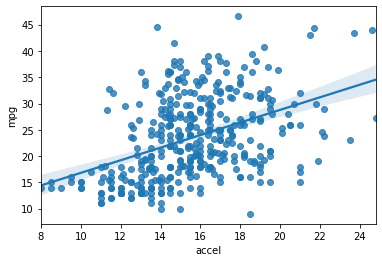

In [159]:
sb.regplot(data =df ,x='accel',y='mpg')

In [160]:
df['accel'] == df['accel'].min()

0      False
1      False
2      False
3      False
4      False
       ...  
387    False
388    False
389    False
390    False
391    False
Name: accel, Length: 392, dtype: bool

In [161]:
df.loc[  df['accel'] == df['accel'].min() ,    ]

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340


<AxesSubplot:xlabel='cyl', ylabel='mpg'>

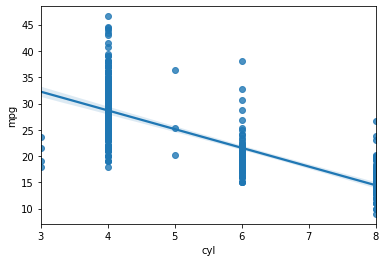

In [162]:
sb.regplot(data=df,x='cyl',y='mpg')

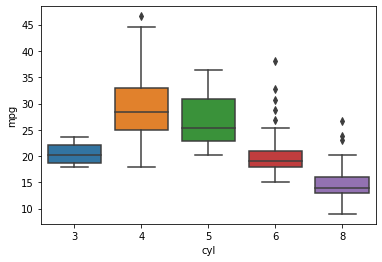

In [168]:
sb.boxplot(data=df,x='cyl',y='mpg')
plt.show()

<AxesSubplot:xlabel='weight', ylabel='mpg'>

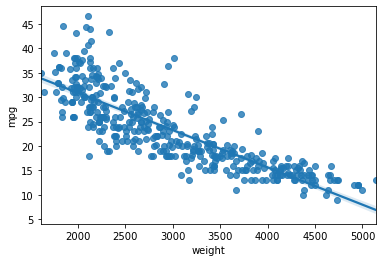

In [169]:
sb.regplot(data=df,x='weight',y='mpg')

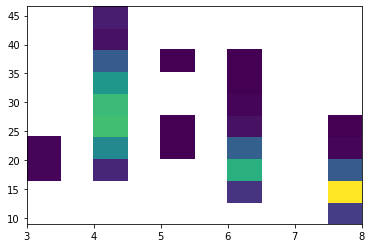

In [165]:
plt.hist2d(data=df,x='cyl',y='mpg',cmin=0.5)
plt.show()

In [135]:
X = df.iloc[:,1:]

In [136]:
X

,cyl,displ,hp,weight,accel,yr,origin,name
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,4,97.0,52,2130,24.6,82,2,vw pickup
389,4,135.0,84,2295,11.6,82,1,dodge rampage
390,4,120.0,79,2625,18.6,82,1,ford ranger


In [137]:
y = df.iloc[:,0]

In [138]:
#컬럼을 변형해야할때 사용하는 도구이다.
from sklearn.compose import ColumnTransformer

In [139]:
#글자 데이터를 숫자로 변형해야할때 사용하는 도구이다.
from sklearn.preprocessing import OneHotEncoder

In [140]:
#문자에 해당하는 컬럼을 지정해주고 나머지는 pass해주라는 명령어이다.
ct = ColumnTransformer( [ ('encoder', OneHotEncoder(),[7]  )  ] , remainder='passthrough' )

In [141]:
X = ct.fit_transform(X)

In [142]:
X[0]

<1x308 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =111)

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
regressor = LinearRegression()

In [147]:
regressor.fit(X_train,y_train)

LinearRegression()

In [148]:
y_pred = regressor.predict(X_test)

In [149]:
y_pred

array([ 8.74595841, 12.29587686, 30.67611615, 28.62933903, 18.85180579,
       27.93988321, 29.14767704, 21.25557988, 29.9321098 , 19.32827369,
       26.83843811, 15.00532617, 18.15954233, 19.50444562, 20.49703768,
       21.59292336, 31.150097  ,  9.96007226, 14.71871689, 33.23444628,
       11.87628589, 30.22109898, 26.29871538, 16.57308154, 28.38727706,
       27.87740025, 30.83382853, 17.7171128 , 32.42775116, 25.2837484 ,
       23.06504038, 26.25323069, 14.27961586, 13.00802649, 26.59740937,
       11.1339648 ,  9.36395473, 15.58937312, 27.59806222, 28.39992744,
       24.86721055, 31.70228335, 40.6763443 , 20.70648971, 22.6534846 ,
       33.38299138, 34.41690274, 13.20947466,  8.17521299, 21.11586776,
       35.17835693, 18.48282566, 35.14033407, 17.45592457, 32.14208043,
       26.90425995, 16.00200027, 23.45818229, 32.03681001,  9.19771326,
       19.81663696, 12.00885628, 19.07423396, 26.48516252, 22.93105523,
       24.07414787, 31.36830512, 28.20635828, 30.61770708, 34.73

In [150]:
y_test=y_test.values

In [151]:
y_test

array([12. , 16. , 23.9, 29. , 22.5, 26. , 24. , 18.1, 21.5, 18. , 25. ,
       15. , 19.4, 19. , 18. , 25. , 34.2, 13. , 15. , 38.1, 15. , 26. ,
       25.5, 13. , 28. , 24.2, 24. , 21. , 32. , 26.5, 19. , 22.3, 18. ,
       16.9, 26.4, 13. , 10. , 15. , 28.4, 28. , 25. , 34.7, 29. , 22. ,
       21. , 23.7, 34.1, 14. , 10. , 19.1, 33. , 20. , 32. , 18. , 36.1,
       28. , 13. , 19. , 34. , 12. , 13. , 14. , 15. , 27. , 22.4, 22. ,
       32.2, 26. , 30. , 36.1, 32.9, 15.5, 31.5, 21. , 20.2, 18.5, 17. ,
       19. , 28. ])

In [152]:
y_test - y_pred

array([ 3.25404159e+00,  3.70412314e+00, -6.77611615e+00,  3.70660968e-01,
        3.64819421e+00, -1.93988321e+00, -5.14767704e+00, -3.15557988e+00,
       -8.43210980e+00, -1.32827369e+00, -1.83843811e+00, -5.32616737e-03,
        1.24045767e+00, -5.04445624e-01, -2.49703768e+00,  3.40707664e+00,
        3.04990300e+00,  3.03992774e+00,  2.81283110e-01,  4.86555372e+00,
        3.12371411e+00, -4.22109898e+00, -7.98715385e-01, -3.57308154e+00,
       -3.87277062e-01, -3.67740025e+00, -6.83382853e+00,  3.28288720e+00,
       -4.27751163e-01,  1.21625160e+00, -4.06504038e+00, -3.95323069e+00,
        3.72038414e+00,  3.89197351e+00, -1.97409367e-01,  1.86603520e+00,
        6.36045266e-01, -5.89373118e-01,  8.01937776e-01, -3.99927438e-01,
        1.32789455e-01,  2.99771665e+00, -1.16763443e+01,  1.29351029e+00,
       -1.65348460e+00, -9.68299138e+00, -3.16902737e-01,  7.90525338e-01,
        1.82478701e+00, -2.01586776e+00, -2.17835693e+00,  1.51717434e+00,
       -3.14033407e+00,  

In [153]:
# MSE
((y_test - y_pred)**2).mean()

11.190889619555916

In [249]:
df2 =df.iloc[:,0:-1]

In [250]:
df2

,mpg,cyl,displ,hp,weight,accel,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1
388,44.0,4,97.0,52,2130,24.6,82,2
389,32.0,4,135.0,84,2295,11.6,82,1
390,28.0,4,120.0,79,2625,18.6,82,1


In [251]:
X2 = df2.iloc[:,1:]

In [252]:
X2

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1
388,4,97.0,52,2130,24.6,82,2
389,4,135.0,84,2295,11.6,82,1
390,4,120.0,79,2625,18.6,82,1


In [253]:
y2 = df2.iloc[:,0]

In [254]:
y2

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [255]:
from sklearn.preprocessing import StandardScaler

In [258]:
ct = ColumnTransformer( [ ('encoder', OneHotEncoder(),[6]  )  ] , remainder='passthrough' )

In [259]:
X2 = ct.fit_transform(X2)

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state =111)

In [262]:
from sklearn.linear_model import LinearRegression

In [263]:
regressor2 = LinearRegression()

In [264]:
regressor2.fit(X2_train,y2_train)

LinearRegression()

In [265]:
regressor2.coef_

array([-2.04203222,  0.82848307,  1.21354916, -0.12518376,  0.0187084 ,
       -0.02289508, -0.00658862,  0.08884974,  0.80345596])

In [266]:
regressor2.intercept_

-18.961296963058707

In [267]:
y2_pred = regressor2.predict(X2_test)

In [268]:
y2_pred

array([ 8.36548798, 11.52291964, 29.90478057, 28.52287392, 22.82586502,
       29.20988836, 28.27716973, 23.01086579, 25.99943842, 21.12197578,
       24.44933894, 12.3145528 , 19.97303399, 19.68749632, 19.60618698,
       23.61588649, 29.00852789,  9.73695544, 14.35047642, 35.02330083,
       10.01707949, 30.40904289, 24.19572672, 18.07647862, 27.60472858,
       28.48655883, 26.16510569, 20.03597123, 30.89153798, 24.83785617,
       23.90856385, 25.06934411, 14.98389704, 17.06488736, 26.07565234,
       10.38072138,  7.90251087, 13.56482101, 26.563339  , 29.0379889 ,
       23.28589892, 30.82792055, 31.00970706, 18.72831689, 21.57347656,
       30.33941046, 35.32022711, 11.93460511,  6.8870993 , 24.05623207,
       33.02260163, 22.7779534 , 36.2516957 , 17.28932774, 30.90776266,
       27.35851085, 16.78650339, 23.06035515, 34.76285834,  8.53507277,
       21.13771892,  9.80659607, 19.61969917, 25.04793534, 24.03235947,
       22.33477893, 32.75865399, 29.79830598, 28.70959547, 34.34

In [269]:
y2_test=y2_test.values

In [270]:
# MSE
((y2_test - y2_pred)**2).mean()

9.705868570845112

In [272]:
regressor2.score(X2_test,y2_test)

0.8049861334964878

In [333]:
df = pd.read_csv('auto-mpg2.csv.txt')

In [334]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [336]:
df['horsepower'] = df['horsepower'].replace('?',np.nan)

In [366]:
df['horsepower'].values

array([130.        , 165.        , 150.        , 150.        ,
       140.        , 198.        , 220.        , 215.        ,
       225.        , 190.        , 170.        , 160.        ,
       150.        , 225.        ,  95.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        ,  95.        , 113.        ,
        90.        , 215.        , 200.        , 210.        ,
       193.        ,  88.        ,  90.        ,  95.        ,
       104.46938776, 100.        , 105.        , 100.        ,
        88.        , 100.        , 165.        , 175.        ,
       153.        , 150.        , 180.        , 170.        ,
       175.        , 110.        ,  72.        , 100.        ,
        88.        ,  86.        ,  90.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        70.        ,  95.        ,  80.        ,  54.        ,
        90.        ,  86.        , 165.        , 175.  

In [339]:
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [343]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [363]:
df['horsepower'].isna().sum()

0

In [345]:
df = df.iloc[:,:7+1]

In [346]:
X = df.iloc[:,1:]

In [347]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [348]:
y= df.loc[:,'mpg']

In [349]:
from sklearn.compose import ColumnTransformer

In [350]:
from sklearn.preprocessing import OneHotEncoder

In [351]:
ct = ColumnTransformer( [ ('encoder', OneHotEncoder(),[6]  )  ] , remainder='passthrough' )

In [352]:
X = ct.fit_transform(X)

In [353]:
from sklearn.model_selection import train_test_split

In [354]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =111)

In [355]:
from sklearn.linear_model import LinearRegression

In [356]:
regressor = LinearRegression()

In [357]:
regressor.fit(X_train,y_train)

LinearRegression()

In [358]:
y_pred = regressor.predict(X_test)

In [359]:
y_pred

array([25.40745813, 27.01914589, 25.21793526, 24.08237723, 32.08940684,
       19.13976301, 31.64587923, 21.52102886, 16.70649528, 31.88758206,
       27.19689344, 33.0954303 , 23.73403585, 22.76707508, 24.93749699,
       23.98496967, 10.45578302, 12.44410002, 23.78453171, 32.46807689,
       20.67540321, 31.83660998, 14.87141403, 23.40345177, 10.74948558,
       20.80384087, 27.01939922, 29.22993519, 34.79827619, 19.21684971,
       28.16549807, 25.61268795, 10.23927593, 20.09096331, 17.0085549 ,
       22.80060697, 22.05965193, 30.82852667, 14.89560024, 33.93344129,
       15.33450489, 23.93718818, 20.39468369,  7.83279692, 11.96735186,
       32.72747665, 35.80771494, 23.1030691 , 23.41442286, 14.24033811,
       32.21517023, 12.80863807, 18.79057095, 28.81402983, 31.11997057,
       24.2267095 , 10.65783239,  7.16575048, 31.23670059, 19.87896847,
       26.21705668, 29.3940593 , 28.57406869, 28.2175254 , 31.36505369,
       19.67087805, 32.80244734, 32.67331315, 10.69399548, 25.02

In [360]:
y_test=y_test.values

In [361]:
y_test

array([22.3, 32.7, 23.8, 26. , 31.5, 18.5, 29. , 21. , 16. , 33. , 18. ,
       43.1, 24. , 24. , 19. , 22.4, 13. , 14. , 20.8, 32.2, 23. , 34.4,
       15. , 20. , 15. , 13. , 26. , 28. , 29.8, 15.5, 30.9, 25.1, 11. ,
       21. , 16. , 23.9, 18. , 32. , 18. , 36.1, 13. , 19.1, 17.6, 10. ,
       14. , 41.5, 31. , 19. , 25. , 15. , 38. , 14. , 22. , 30.5, 31.3,
       19. , 14. , 10. , 37. , 16.5, 21.5, 27.2, 31. , 24. , 31.6, 18. ,
       32.8, 36. , 14. , 27. , 38. , 24. , 18. , 32.4, 29.8, 19.4, 34. ,
       15. , 17.5, 22. ])

In [362]:
# MSE
((y_test - y_pred)**2).mean()

11.947086105310111

In [367]:
regressor.score(X_test,y_test)

0.8136437626468301

In [368]:
df2 = pd.read_csv('auto-mpg2.csv.txt')

In [404]:
Error_of_horespower =[]
for i in range(len(df2['horsepower'])):
       Error_of_horespower.append(df2['horsepower'].values[i].isdigit())

In [405]:
Error_of_horespower = pd.DataFrame(Error_of_horespower)

In [407]:
Error_of_horespower.loc[Error_of_horespower[0] == False,]

,0
32,False
126,False
330,False
336,False
354,False
374,False


In [408]:
Error_of_horespower.loc[Error_of_horespower[0] == False,].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [409]:
df2.iloc[[32, 126, 330, 336, 354, 374],3] = np.nan

In [412]:
df2['horsepower'].isna().sum()

6

In [ ]:
##errors = 'coerce' : nan data로 바꾸어주었다. 

In [413]:
#df['horsepower'].replace('?',np.nan)

In [414]:
#hp_num = pd.to_numeric(df['hoursepower'] , errors = 'coerce' )

KeyError: 'hoursepower'